

Heart Disease

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Đọc bộ dữ liệu Heart Disease và kiểm tra hình dạng dữ liệu

In [62]:
data = pd.read_csv("/content/drive/MyDrive/last_report/heart_2020_cleaned.csv")

In [63]:
data.shape
data_org = data.copy()
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


2. Kiểm tra thống kê cơ bản của dữ liệu

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [65]:
data.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [66]:
data =  data[data.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
data['Diabetic'] = data['Diabetic'].astype(int)

In [67]:
# encode 'AgeCategory' column
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
data['AgeCategory'] = data['AgeCategory'].astype(int)
data['AgeCategory']

0         57
1         80
2         67
3         77
4         42
          ..
319790    62
319791    37
319792    47
319793    27
319794    80
Name: AgeCategory, Length: 319795, dtype: int64

<ipython-input-68-f808b15d96eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr().round(2)


<Axes: >

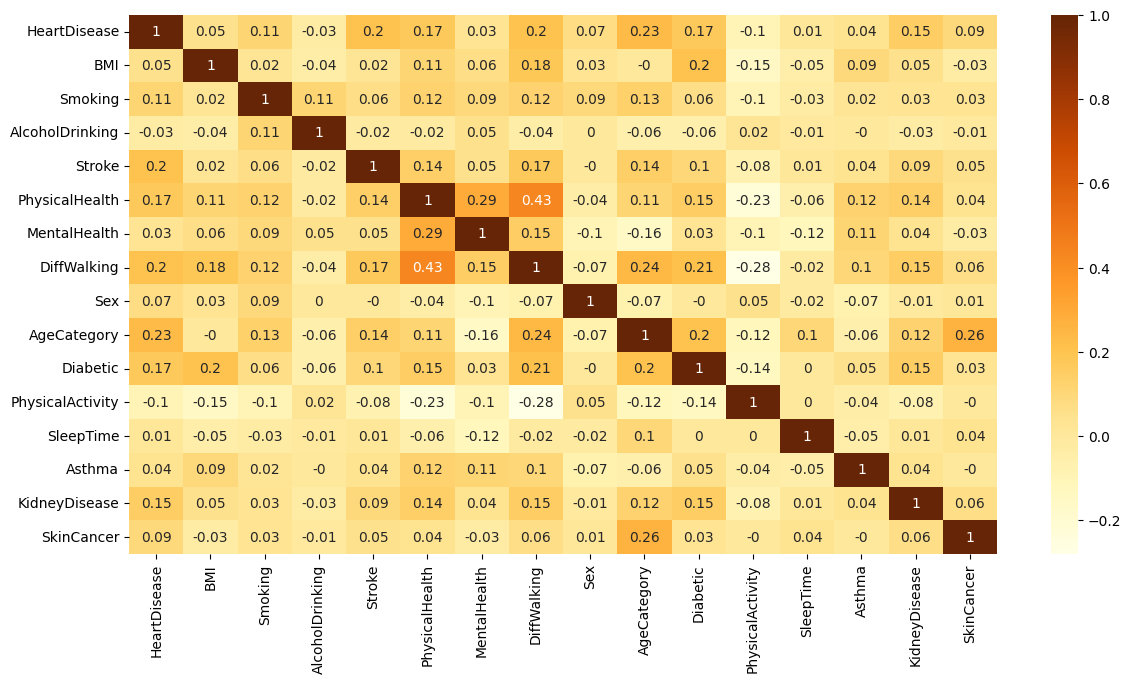

In [68]:
import seaborn as sns
correlation = data.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [69]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [70]:
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
data.describe()[1:][list(numeric_features)].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
HeartDisease,0.085595,0.279766,0.000000,0.000000,0.000000,0.000000,1.000000
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
Smoking,0.412477,0.492281,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholDrinking,0.068097,0.251912,0.000000,0.000000,0.000000,0.000000,1.000000
Stroke,0.037740,0.190567,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
DiffWalking,0.138870,0.345812,0.000000,0.000000,0.000000,0.000000,1.000000
Sex,0.475273,0.499389,0.000000,0.000000,0.000000,1.000000,1.000000
AgeCategory,54.355759,17.720429,21.000000,42.000000,57.000000,67.000000,80.000000


In [71]:
data['HeartDisease'].value_counts()


0    292422
1     27373
Name: HeartDisease, dtype: int64

Các giá trị trùng lặp trong DataFrame

In [72]:
data.duplicated().sum()

18491

In [73]:
# xoá các giá trị trung lặp trong DataFrame
data.drop_duplicates(inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

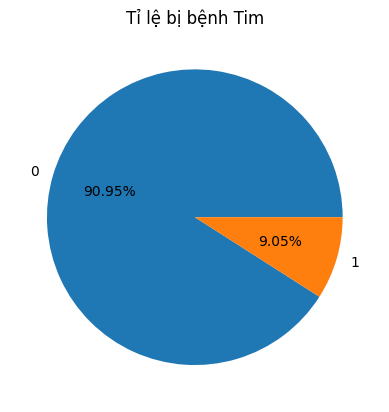

In [ ]:
#show Ratio of HeartDisease from data
plt.pie(x = data['HeartDisease'].value_counts() ,autopct='%1.2f%%' ,
        labels=data['HeartDisease'].value_counts().index)
plt.title('Tỉ lệ bị bệnh Tim')
plt.show


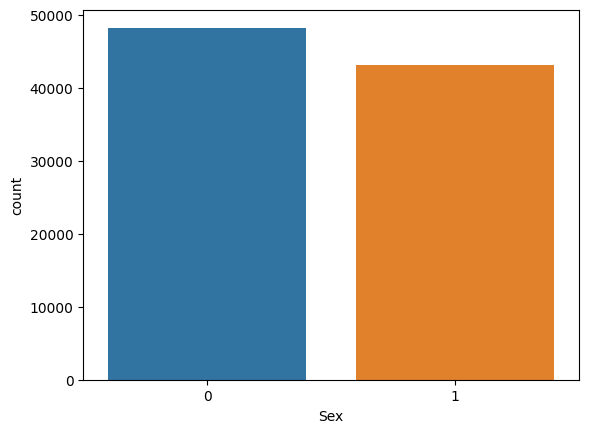

In [ ]:
import seaborn as sns

sns.countplot(x = data['Sex'])
plt.show()

In [ ]:
data.groupby(['Sex','HeartDisease'])['HeartDisease'].count()


Sex  HeartDisease
0    0               44852
     1                3366
1    0               38425
     1                4628
Name: HeartDisease, dtype: int64

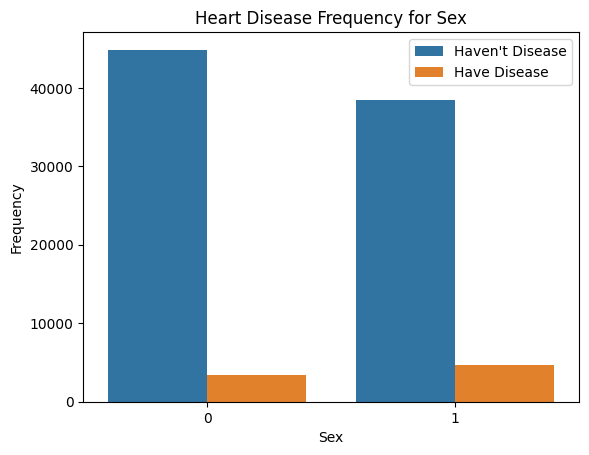

In [ ]:
sns.countplot(x = data['Sex'], data = data, hue ='HeartDisease')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
data['AgeCategory'].value_counts()

9     9577
8     9268
10    9112
7     8105
12    7462
6     7139
11    6619
5     6136
0     5869
3     5862
4     5818
2     5472
1     4832
Name: AgeCategory, dtype: int64

In [74]:
data.groupby(['AgeCategory','HeartDisease'])['HeartDisease'].count()

AgeCategory  HeartDisease
21           0               19859
             1                 130
27           0               16178
             1                 133
32           0               17719
             1                 226
37           0               19220
             1                 296
42           0               19344
             1                 486
47           0               19761
             1                 743
52           0               22324
             1                1383
57           0               25358
             1                2198
62           0               27830
             1                3321
67           0               27530
             1                4074
72           0               24393
             1                4816
77           0               16644
             1                4026
80           0               17887
             1                5425
Name: HeartDisease, dtype: int64

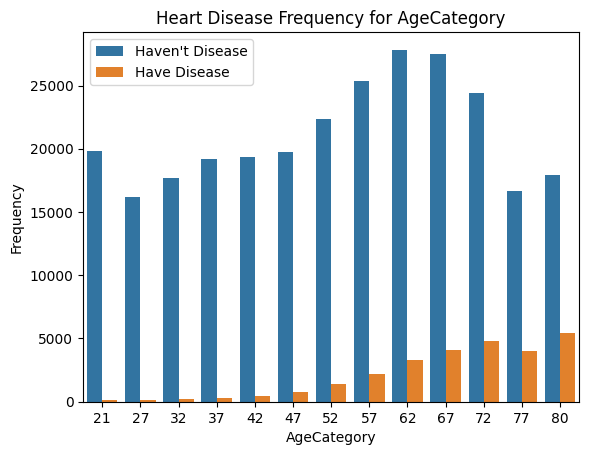

In [75]:
sns.countplot(x ='AgeCategory', data = data, hue ='HeartDisease')
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
data['Smoking'].value_counts()

No     174312
Yes    127405
Name: Smoking, dtype: int64

In [ ]:
data.groupby(['Sex','AgeCategory','Smoking','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  Smoking  HeartDisease
Female  18-24        No       No              7963
                              Yes               40
                     Yes      No              1132
                              Yes               10
        25-29        No       No              5746
                                              ... 
Male    75-79        Yes      Yes             1552
        80 or older  No       No              2905
                              Yes             1086
                     Yes      No              3512
                              Yes             1724
Name: HeartDisease, Length: 104, dtype: int64

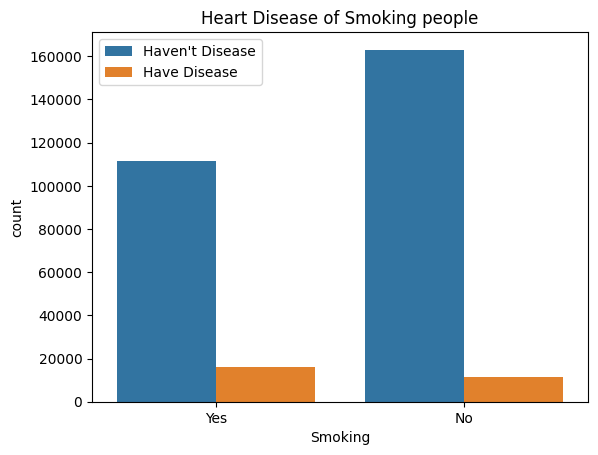

In [ ]:
sns.countplot(x='Smoking',data = data,hue='HeartDisease')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')
plt.show()

In [ ]:
data['AlcoholDrinking'].value_counts()

No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64

In [ ]:
data.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              254016
                 Yes              26120
Yes              No               20440
                 Yes               1141
Name: HeartDisease, dtype: int64

In [ ]:
data.groupby(['Sex','AgeCategory','AlcoholDrinking','PhysicalActivity','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  AlcoholDrinking  PhysicalActivity  HeartDisease
Female  18-24        No               No                No              1419
                                                        Yes                9
                                      Yes               No              6942
                                                        Yes               38
                     Yes              No                No                66
                                                                        ... 
Male    80 or older  No               Yes               Yes             1780
                     Yes              No                No                59
                                                        Yes               34
                                      Yes               No               127
                                                        Yes               41
Name: HeartDisease, Length: 208, dtype: int64

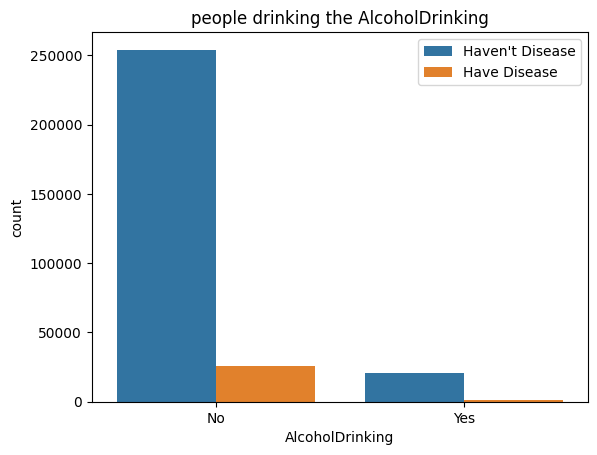

In [ ]:
sns.countplot(x = data['AlcoholDrinking'],data = data , hue ='HeartDisease')
plt.title('people drinking the AlcoholDrinking')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('AlcoholDrinking')
plt.show()

In [ ]:
data['KidneyDisease'].value_counts()

No     289941
Yes     11776
Name: KidneyDisease, dtype: int64

In [ ]:
data.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              266134
               Yes              23807
Yes            No                8322
               Yes               3454
Name: HeartDisease, dtype: int64

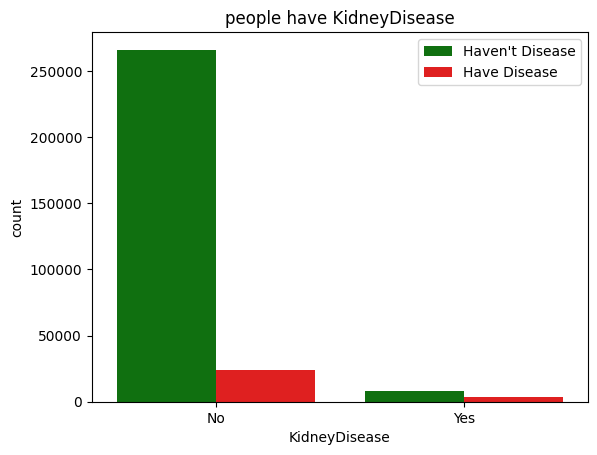

In [ ]:
sns.countplot( x = 'KidneyDisease', data=data, hue='HeartDisease',palette=['green','red'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()


In [ ]:
data.groupby(['Sex','SkinCancer'])['SkinCancer'].count()

Sex     SkinCancer
Female  No            144876
        Yes            14795
Male    No            127549
        Yes            14497
Name: SkinCancer, dtype: int64

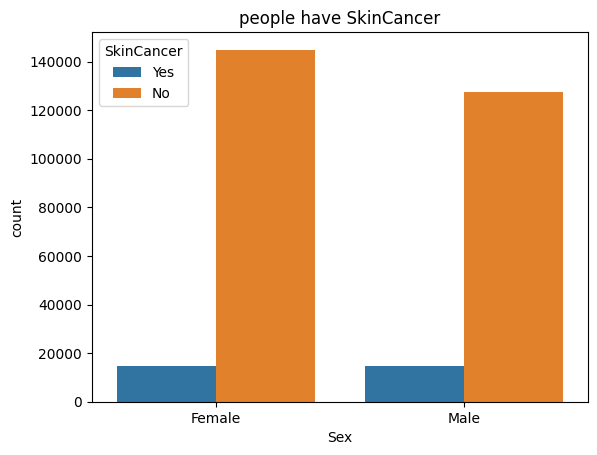

In [ ]:
sns.countplot(x='Sex',data = data, hue='SkinCancer')
plt.title('people have SkinCancer')
plt.show()

In [ ]:
data.groupby(['Sex','SkinCancer','HeartDisease'])['HeartDisease'].count()

Sex     SkinCancer  HeartDisease
Female  No          No              135339
                    Yes               9537
        Yes         No               13119
                    Yes               1676
Male    No          No              114793
                    Yes              12756
        Yes         No               11205
                    Yes               3292
Name: HeartDisease, dtype: int64

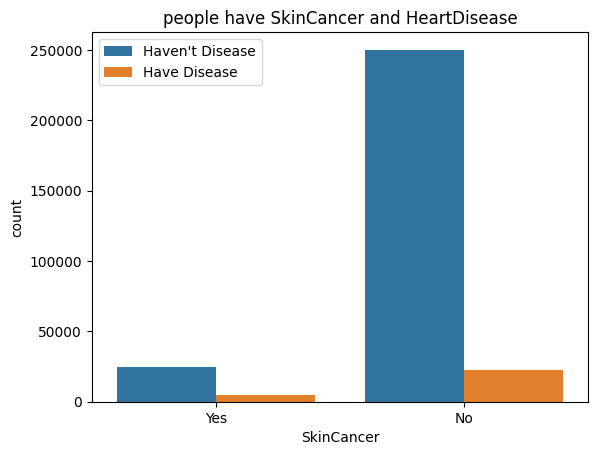

In [ ]:
sns.countplot(x = 'SkinCancer', data = data , hue = 'HeartDisease')
plt.title('people have SkinCancer and HeartDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

In [76]:
# Encode all columns
columns_df = list(data.columns.values)

# Danh sách các cột có kiểu dữ liệu categorical cần xử lý
cat_cols = ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
            "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity",
            "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]

# Xử lý biến dạng categorical sử dụng One-Hot Encoding
for cat_col in cat_cols:
    # Tạo các cột mới dựa trên các giá trị unique trong cột gốc
    dummy_col = pd.get_dummies(data[cat_col], prefix=cat_col)
    # Kết hợp các cột mới vào DataFrame
    data = pd.concat([data, dummy_col], axis=1)
    # Loại bỏ cột gốc
    del data[cat_col]

# Xử lý biến dạng categorical sử dụng Label Encoding
for col in ['HeartDisease']:
    # Kiểm tra kiểu dữ liệu của cột
    if data[col].dtype == 'O':
        # Sử dụng Label Encoding để chuyển đổi giá trị chuỗi thành số nguyên
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
data.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_0,Smoking_1,AlcoholDrinking_0,AlcoholDrinking_1,Stroke_0,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_0,Asthma_1,KidneyDisease_0,KidneyDisease_1,SkinCancer_0,SkinCancer_1
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0


In [77]:
data_enc_mix = data_org.copy()

In [78]:
from sklearn.preprocessing import LabelEncoder


# Định nghĩa một đối tượng LabelEncoder
le = LabelEncoder()

# Lấy danh sách tên cột dạng categorical
categorical_cols = data_enc_mix.select_dtypes(include=['object', 'category']).columns.tolist()

# Lấy danh sách tên cột có kiểu dữ liệu 'object' hoặc 'category'

# Xử lý dạng trộn giữa Label Encoding và One-Hot Encoding
for col in categorical_cols:
    # Nếu số giá trị unique trong cột nhỏ hơn hoặc bằng 2
    if len(data_enc_mix[col].unique()) <= 2:
        # Label encode biến nhị phân (binary variables)
        data_enc_mix[col] = le.fit_transform(data_enc_mix[col])
    else:
        # One-hot encode biến không nhị phân (non-binary variables)
        data_enc_mix = pd.get_dummies(data_enc_mix, columns=[col])

# Hiển thị 5 hàng đầu tiên của dataFrame đã xử lý
data_enc_mix.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,1,1,0,0,0,0,0,0,0,1


In [79]:
# Lặp qua từng tên cột trong DataFrame để in ra các giá trị duy nhất của từng cột
for column in list(data.columns.values):
    # In ra tên cột và danh sách các giá trị duy nhất trong cột
    print(column, ':', str(data[column].unique()))

HeartDisease : [0 1]
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Smoking_0 : [0 1]
Smoking_1 : [1 0]
AlcoholDrinking_0 : [1 0]
AlcoholDrinking_1 : [0 1]
Stroke_0 : [1 0]
Stroke_1 : [0 1]
DiffWalking_0 : [1 0]
DiffWalking_1 : [0 1]
Sex_0 : [1 0]
Sex_1 : [0 1]
AgeCategory_21 : [0 1]
AgeCategory_27 : [0 1]
AgeCategory_32 : [0 1]
AgeCategory_37 : [0 1]
AgeCategory_42 : [0 1]
AgeCategory_47 : [0 1]
AgeCategory_52 : [0 1]
AgeCategory_57 : [1 0]
AgeCategory_62 : [0 1]
AgeCategory_67 : [0 1]
AgeCategory_72 : [0 1]
AgeCategory_77 : [0 1]
AgeCategory_80 : [0 1]
Race_American Indian/Alaskan Native : [0 

In [80]:
# Lặp qua danh sách tên các cột để in ra các giá trị duy nhất của mỗi cột trong dataframe
for column in list(data_enc_mix.columns.values):
    # In ra tên cột và các giá trị duy nhất tương ứng trong cột
    print(column, ':', str(data_enc_mix[column].unique()))


HeartDisease : [0 1]
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : [1 0]
AlcoholDrinking : [0 1]
Stroke : [0 1]
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking : [0 1]
Sex : [0 1]
PhysicalActivity : [1 0]
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma : [1 0]
KidneyDisease : [0 1]
SkinCancer : [1 0]
AgeCategory_18-24 : [0 1]
AgeCategory_25-29 : [0 1]
AgeCategory_30-34 : [0 1]
AgeCategory_35-39 : [0 1]
AgeCategory_40-44 : [0 1]
AgeCategory_45-49 : [0 1]
AgeCategory_50-54 : [0 1]
AgeCategory_55-59 : [1 0]
AgeCategory_60-64 : [0 1]
AgeCategory_65-69 : [0 1]
AgeCategory_70-74 : [0 1]
AgeCategory_75-79 : [0 1]
AgeCategory_80 or older : [0 1]
Race_American Indian/A

In [81]:
from sklearn.model_selection import train_test_split

# Sử dụng train_test_split để chia dữ liệu thành tập huấn luyện và tập kiểm tra
# Tỉ lệ chia là 70% cho tập huấn luyện và 30% cho tập kiểm tra
train_data, test_data = train_test_split(data, train_size=0.70)

# In ra kích thước (số hàng và số cột) của tập huấn luyện và tập kiểm tra
train_data.shape, test_data.shape


((210912, 49), (90392, 49))

In [82]:
# Sử dụng train_test_split để chia dữ liệu từ DataFrame data_enc_mix thành tập huấn luyện và tập kiểm tra
# Tỉ lệ chia là 70% cho tập huấn luyện và 30% cho tập kiểm tra
train_data_label, test_data_label = train_test_split(data_enc_mix, train_size=0.70)

# In ra kích thước (số hàng và số cột) của tập huấn luyện và tập kiểm tra
train_data_label.shape, test_data_label.shape


((223856, 42), (95939, 42))

In [83]:
# Chia tập huấn luyện và tập kiểm tra thành đặc trưng (features) và nhãn (labels)
X_train = train_data.drop('HeartDisease', axis=1)
y_train = train_data['HeartDisease']
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

X_test = test_data.drop('HeartDisease', axis=1)
y_test = test_data['HeartDisease']
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


X_train shape: (210912, 48) y_train shape: (210912,)
X_test shape: (90392, 48) y_test shape: (90392,)


In [84]:
# Chia tập huấn luyện và tập kiểm tra cho phương pháp mã hóa MỚI thành đặc trưng (features) và nhãn (labels)
X_train_new = train_data_label.drop('HeartDisease', axis=1)
y_train_new = train_data_label['HeartDisease']
print("X_train_new shape:", X_train_new.shape, "y_train_new shape:", y_train_new.shape)

X_test_new = test_data_label.drop('HeartDisease', axis=1)
y_test_new = test_data_label['HeartDisease']
print("X_test_new shape:", X_test_new.shape, "y_test_new shape:", y_test_new.shape)


X_train_new shape: (223856, 41) y_train_new shape: (223856,)
X_test_new shape: (95939, 41) y_test_new shape: (95939,)


In [85]:
from sklearn.preprocessing import StandardScaler

# Tạo đối tượng StandardScaler
sc = StandardScaler()

# Tiêu chuẩn hóa dữ liệu trong tập huấn luyện và tập kiểm tra
# không gây ra việc rò rỉ dữ liệu vì ta sử dụng thông tin từ tập huấn luyện
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Tiêu chuẩn hóa dữ liệu cho phương pháp mã hóa MỚI
X_train_new = sc.fit_transform(X_train_new)
X_test_new = sc.transform(X_test_new)


In [86]:
X_train

array([[-0.54995681, -0.43975754, -0.01538915, ..., -0.20199162,
         0.32776309, -0.32776309],
       [-0.18313296, -0.43975754, -0.50713304, ..., -0.20199162,
         0.32776309, -0.32776309],
       [-1.28515229, -0.31706162, -0.50713304, ..., -0.20199162,
         0.32776309, -0.32776309],
       ...,
       [-0.40601327, -0.43975754, -0.50713304, ..., -0.20199162,
         0.32776309, -0.32776309],
       [ 0.16976087, -0.43975754, -0.50713304, ..., -0.20199162,
         0.32776309, -0.32776309],
       [ 0.0056962 , -0.43975754,  0.7222267 , ..., -0.20199162,
         0.32776309, -0.32776309]])

In [87]:
X_train_new

array([[-0.40105712, -0.8372388 , -0.2702449 , ...,  1.55835937,
        -0.18971417, -0.74362693],
       [-0.39318292, -0.8372388 , -0.2702449 , ..., -0.64170051,
        -0.18971417, -0.74362693],
       [ 0.7139298 , -0.8372388 , -0.2702449 , ...,  1.55835937,
        -0.18971417, -0.74362693],
       ...,
       [-0.4042068 ,  1.19440236, -0.2702449 , ..., -0.64170051,
        -0.18971417,  1.34476034],
       [-0.51287078,  1.19440236, -0.2702449 , ...,  1.55835937,
        -0.18971417, -0.74362693],
       [ 0.72022916,  1.19440236, -0.2702449 , ..., -0.64170051,
        -0.18971417, -0.74362693]])

In [88]:
data['HeartDisease'].value_counts()

0    274047
1     27257
Name: HeartDisease, dtype: int64

In [89]:
data_enc_mix['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [90]:
# Import SMOTE từ module imblearn.over_sampling
from imblearn.over_sampling import SMOTE

# Import NearMiss từ module imblearn.under_sampling
from imblearn.under_sampling import NearMiss

# Import Counter từ module collections
from collections import Counter


In [91]:
# Cân bằng tập dữ liệu sử dụng phương pháp SMOTE (Synthetic Minority Oversampling Technique)
# Với 'sampling_strategy' được đặt là 'minority'
smote = SMOTE(sampling_strategy='minority')
X_train_smote , y_train_smote = smote.fit_resample(X_train, y_train)

# In ra số lượng nhãn trong tập dữ liệu gốc và tập dữ liệu sau khi sử dụng SMOTE
print('Original: {}'.format(Counter(y_train)))
print('   SMOTE: {}'.format(Counter(y_train_smote)))


Original: Counter({0: 191816, 1: 19096})
   SMOTE: Counter({0: 191816, 1: 191816})


In [92]:
# Cân bằng tập dữ liệu mới sử dụng phương pháp SMOTE (Synthetic Minority Oversampling Technique)
X_train_smote_new , y_train_smote_new = smote.fit_resample(X_train_new, y_train_new)

# In ra số lượng nhãn trong tập dữ liệu mới và tập dữ liệu sau khi sử dụng SMOTE
print('Original: {}'.format(Counter(y_train_new)))
print('  SMOTE2: {}'.format(Counter(y_train_smote_new)))


Original: Counter({0: 204741, 1: 19115})
  SMOTE2: Counter({0: 204741, 1: 204741})


In [93]:
# Sử dụng phương pháp NearMiss để cân bằng tập dữ liệu
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)

# In ra số lượng nhãn trong tập dữ liệu gốc và tập dữ liệu sau khi sử dụng NearMiss
print('Original: {}'.format(Counter(y_train)))
print('NearMiss: {}'.format(Counter(y_train_nearmiss)))


Original: Counter({0: 191816, 1: 19096})
NearMiss: Counter({0: 19096, 1: 19096})


In [94]:
# Sử dụng phương pháp NearMiss để cân bằng tập dữ liệu mới
X_train_nearmiss_new, y_train_nearmiss_new = nearmiss.fit_resample(X_train_new, y_train_new)

# In ra số lượng nhãn trong tập dữ liệu mới và tập dữ liệu sau khi sử dụng NearMiss
print(' Original: {}'.format(Counter(y_train_new)))
print('NearMiss2: {}'.format(Counter(y_train_nearmiss_new)))


 Original: Counter({0: 204741, 1: 19115})
NearMiss2: Counter({0: 19115, 1: 19115})


In [95]:
# Sử dụng phương pháp KFold để thực hiện cross validation
from sklearn.model_selection import KFold

# Tạo một 10-fold cross validation
cv = KFold(n_splits=10, random_state=None, shuffle=False)


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

Decision Tree

In [47]:
# Định nghĩa hàm tạo mô hình Decision Tree và tham số
def dt_model():
    # Tạo mô hình Decision Tree
    model_dt = DecisionTreeClassifier()

    # Định nghĩa danh sách các tham số để tìm kiếm tốt nhất
    params_dt = {"criterion": ['gini', 'entropy'], "max_depth": [100], "random_state": [1024]}

    # Tạo mô hình Decision Tree với cross validation và tìm kiếm tham số tốt nhất
    model_dt_cv = GridSearchCV(model_dt,
                               param_grid=params_dt,
                               cv=cv,
                               n_jobs=-1,
                               verbose=1)

    return model_dt_cv


In [48]:
# Tạo mô hình Decision Tree với tìm kiếm tham số tốt nhất và dữ liệu đã được cân bằng bằng SMOTE
model_dt_cv_smote = dt_model()

# Huấn luyện mô hình với dữ liệu đã được cân bằng bằng SMOTE
model_dt_cv_smote.fit(X_train_smote, y_train_smote)

# In ra các tham số tốt nhất tìm được bằng SMOTE
print("Best Hyper Parameters for SMOTE: ", model_dt_cv_smote.best_params_)


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE:  {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}


In [49]:
# fit the model for NEW encoding method - SMOTE
model_dt_cv_smote_new = dt_model()
model_dt_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_dt_cv_smote_new.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE2:  {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}


In [50]:
model_dt_cv_nearmiss = dt_model()
model_dt_cv_nearmiss.fit(X_train_nearmiss ,y_train_nearmiss)
print("Best Hyper Parameters for NearMiss: ", model_dt_cv_nearmiss.best_params_)


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for NearMiss:  {'criterion': 'gini', 'max_depth': 100, 'random_state': 1024}


In [51]:
# fit the model for New encoding method - NearMiss
model_dt_cv_nearmiss_new = dt_model()
model_dt_cv_nearmiss_new.fit(X_train_nearmiss_new ,y_train_nearmiss_new)
print("Best Hyper Parameters for NearMiss2: ", model_dt_cv_nearmiss_new.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for NearMiss2:  {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}


In [52]:
# Dự đoán kết quả sử dụng mô hình tốt nhất (SMOTE)
y_pred_dt_smote = model_dt_cv_smote.predict(X_test)

# In ra báo cáo phân loại cho mô hình với dữ liệu đã cân bằng bằng SMOTE
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_dt_smote))
# print the best score (SMOTE)

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91     82189
           1       0.21      0.30      0.24      8203

    accuracy                           0.83     90392
   macro avg       0.57      0.59      0.58     90392
weighted avg       0.86      0.83      0.85     90392



In [53]:
# Dự đoán kết quả sử dụng mô hình tốt nhất (SMOTE) với phương pháp mã hóa MỚI
y_pred_dt_smote_new = model_dt_cv_smote_new.predict(X_test_new)

# In ra báo cáo phân loại cho mô hình với dữ liệu đã cân bằng bằng SMOTE và phương pháp mã hóa MỚI
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_dt_smote_new))


Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92     87682
           1       0.21      0.29      0.24      8257

    accuracy                           0.85     95939
   macro avg       0.57      0.59      0.58     95939
weighted avg       0.87      0.85      0.86     95939



In [54]:
# Dự đoán kết quả sử dụng mô hình tốt nhất (NearMiss)
y_pred_dt_nearmiss = model_dt_cv_nearmiss.predict(X_test)

# In ra báo cáo phân loại cho mô hình với dữ liệu đã cân bằng bằng NearMiss
print("Classification Report for NearMiss: \n", classification_report(y_test, y_pred_dt_nearmiss))


Classification Report for NearMiss: 
               precision    recall  f1-score   support

           0       0.92      0.42      0.58     82189
           1       0.10      0.62      0.17      8203

    accuracy                           0.44     90392
   macro avg       0.51      0.52      0.37     90392
weighted avg       0.84      0.44      0.54     90392



In [55]:
# Dự đoán kết quả sử dụng mô hình tốt nhất (NearMiss) với phương pháp mã hóa MỚI
y_pred_dt_nearmiss_new = model_dt_cv_nearmiss_new.predict(X_test_new)

# In ra báo cáo phân loại cho mô hình với dữ liệu đã cân bằng bằng NearMiss và phương pháp mã hóa MỚI
print("Classification Report for NearMiss2: \n", classification_report(y_test_new, y_pred_dt_nearmiss_new))


Classification Report for NearMiss2: 
               precision    recall  f1-score   support

           0       0.92      0.40      0.55     87682
           1       0.09      0.62      0.15      8257

    accuracy                           0.41     95939
   macro avg       0.50      0.51      0.35     95939
weighted avg       0.85      0.41      0.52     95939



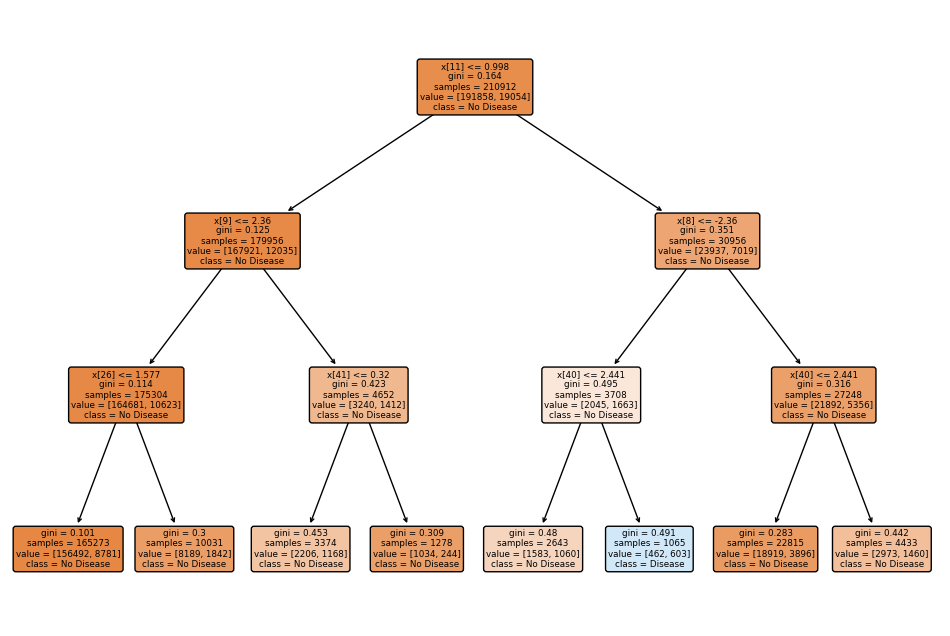

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Tạo mô hình DecisionTreeClassifier với độ sâu là 3
tree = DecisionTreeClassifier(max_depth=3)

# Huấn luyện mô hình trên dữ liệu
tree.fit(X_train, y_train)

# Vẽ cây quyết định với độ sâu là 3
plt.figure(figsize=(12, 8))
plot_tree(tree, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
plt.show()



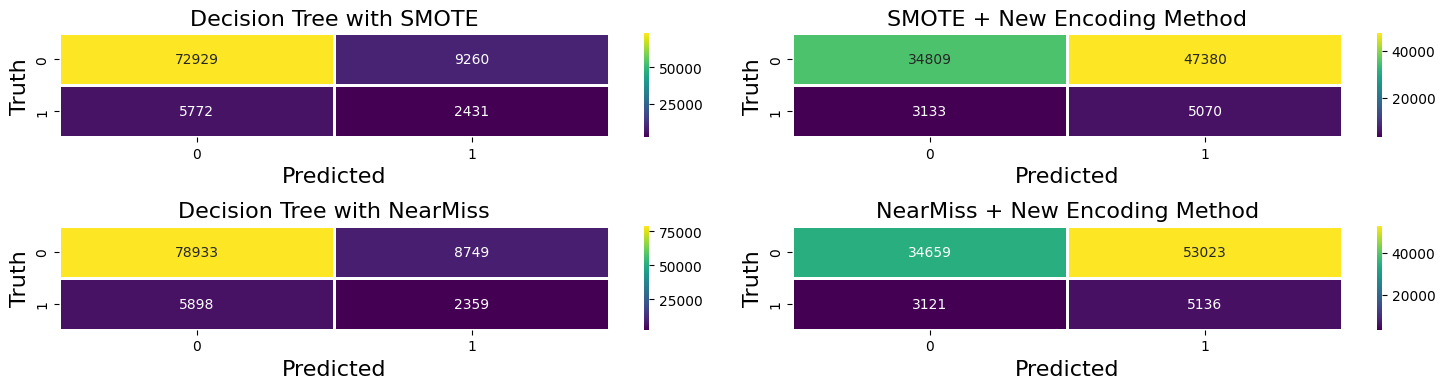

In [57]:
# Import các thư viện cần thiết
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tính ma trận nhầm lẫn cho từng mô hình
cm_dt_smote = confusion_matrix(y_test, y_pred_dt_smote) # Ma trận nhầm lẫn
cm_dt_nearmiss = confusion_matrix(y_test, y_pred_dt_nearmiss) # Ma trận nhầm lẫn
cm_dt_smote_new = confusion_matrix(y_test_new, y_pred_dt_smote_new) # Ma trận nhầm lẫn
cm_dt_nearmiss_new = confusion_matrix(y_test_new, y_pred_dt_nearmiss_new) # Ma trận nhầm lẫn

# Định nghĩa hàm để vẽ ma trận nhầm lẫn
def plot_confusion_matrix(ax, cm, title='Confusion matrix', cmap='viridis'):
    sn.heatmap(cm, annot=True, linewidths=0.8, fmt='d', cmap=cmap, ax=ax)
    ax.set_xlabel('Predicted', fontsize=16)
    ax.set_ylabel('Truth', fontsize=16)
    ax.set_title(title, fontsize=16)

# Tạo một biểu đồ 2x2 với các ma trận nhầm lẫn
fig, axs = plt.subplots(2, 2, figsize=(15, 4))

# Vẽ ma trận nhầm lẫn cho từng mô hình
plot_confusion_matrix(axs[0, 0], cm_dt_smote, title='Decision Tree with SMOTE')
plot_confusion_matrix(axs[0, 1], cm_dt_nearmiss, title='SMOTE + New Encoding Method')
plot_confusion_matrix(axs[1, 0], cm_dt_smote_new, title='Decision Tree with NearMiss')
plot_confusion_matrix(axs[1, 1], cm_dt_nearmiss_new, title='NearMiss + New Encoding Method')

# Tùy chỉnh layout và hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [58]:
from sklearn.metrics import accuracy_score

# Tính độ chính xác trên tập huấn luyện và tập thử nghiệm (SMOTE)
train_accuracy_smote = model_dt_cv_smote.score(X_train_smote, y_train_smote)
test_accuracy_smote = accuracy_score(y_test, y_pred_dt_smote)

# Tính độ chính xác trên tập huấn luyện và tập thử nghiệm (NearMiss)
train_accuracy_nearmiss = model_dt_cv_nearmiss.score(X_train_nearmiss, y_train_nearmiss)
test_accuracy_nearmiss = accuracy_score(y_test, y_pred_dt_nearmiss)

print("Accuracy on Train Set (SMOTE):", train_accuracy_smote)
print("Accuracy on Test Set (SMOTE):", test_accuracy_smote)
print("Accuracy on Train Set (NearMiss):", train_accuracy_nearmiss)
print("Accuracy on Test Set (NearMiss):", test_accuracy_nearmiss)

Accuracy on Train Set (SMOTE): 0.9984571922984707
Accuracy on Test Set (SMOTE): 0.833702097530755
Accuracy on Train Set (NearMiss): 0.9997638291172457
Accuracy on Test Set (NearMiss): 0.44117842286928044


RandomForestClassifier

In [111]:
from sklearn.ensemble import RandomForestClassifier as RF
# Nhập thư viện RandomForestClassifier và đặt tên tắt là RF

# Tạo mô hình RandomForestClassifier và tham số
def rf_model():
    model_rf = RandomForestClassifier()
    # Tạo một mô hình RandomForestClassifier (Rừng ngẫu nhiên)

    params_rf = {"criterion":['gini','entropy']}
    # Định nghĩa các tham số mà chúng ta muốn thử nghiệm trong mô hình

    model_rf_cv = GridSearchCV(model_rf,
                            param_grid = params_rf,
                            cv = cv,
                            verbose = 1)
    # Sử dụng GridSearchCV để tìm kiếm các tham số tốt nhất cho mô hình RandomForestClassifier
    # param_grid: Các giá trị của tham số mà chúng ta muốn thử nghiệm
    # cv: Số lượng chia nhỏ tập dữ liệu để thực hiện kiểm tra chéo (cross-validation)
    # verbose: Hiển thị thông tin chi tiết trong quá trình tìm kiếm

    return model_rf_cv
    # Trả về mô hình RandomForestClassifier đã được tinh chỉnh tốt nhất


In [101]:
# Tiến hành cân bằng dữ liệu bằng SMOTE trước khi huấn luyện
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Huấn luyện mô hình trên dữ liệu đã cân bằng bằng SMOTE
model_rf_cv_smote.fit(X_train_smote, y_train_smote)

# In ra các siêu tham số tốt nhất tìm thấy bởi GridSearchCV cho mô hình với phương pháp SMOTE
print("Best Hyper Parameters for SMOTE: ", model_rf_cv_smote.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE:  {'criterion': 'entropy'}


In [102]:
# Tạo và đào tạo mô hình RandomForestClassifier với các siêu tham số tốt nhất
model_rf_cv_smote_new = rf_model()
# Sử dụng hàm rf_model để tạo mô hình RandomForestClassifier đã tinh chỉnh

model_rf_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
# Đào tạo mô hình trên dữ liệu đã được cân bằng bằng phương pháp SMOTE và mã hóa mới

print("Best Hyper Parameters for SMOTE2: ", model_rf_cv_smote_new.best_params_)
# In ra các siêu tham số tốt nhất đã tìm kiếm cho mô hình

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE2:  {'criterion': 'entropy'}


In [103]:
# Tạo và đào tạo mô hình RandomForestClassifier với các siêu tham số tốt nhất
model_rf_cv_nearmiss = rf_model()
# Sử dụng hàm rf_model để tạo mô hình RandomForestClassifier đã tinh chỉnh

model_rf_cv_nearmiss.fit(X_train_nearmiss ,y_train_nearmiss)
# Đào tạo mô hình trên dữ liệu đã được cân bằng bằng phương pháp NearMiss và mã hóa ban đầu

print("Best Hyper Parameters for NearMiss: ", model_rf_cv_nearmiss.best_params_)
# In ra các siêu tham số tốt nhất đã tìm kiếm cho mô hình


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for NearMiss:  {'criterion': 'gini'}


In [104]:
# Tạo và đào tạo mô hình RandomForestClassifier với các siêu tham số tốt nhất
model_rf_cv_nearmiss_new = rf_model()
# Sử dụng hàm rf_model để tạo mô hình RandomForestClassifier đã tinh chỉnh

model_rf_cv_nearmiss_new.fit(X_train_nearmiss_new ,y_train_nearmiss_new)
# Đào tạo mô hình trên dữ liệu đã được cân bằng bằng phương pháp NearMiss và mã hóa mới

print("Best Hyper Parameters for NearMiss2: ", model_rf_cv_nearmiss_new.best_params_)
# In ra các siêu tham số tốt nhất đã tìm kiếm cho mô hình


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for NearMiss2:  {'criterion': 'gini'}


In [105]:
# Dự đoán kết quả trên tập kiểm tra sử dụng mô hình đã tạo với phương pháp SMOTE
y_pred_rf_smote = model_rf_cv_smote.predict(X_test)

# In ra báo cáo phân loại (classification report) cho kết quả dự đoán
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_rf_smote))


Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     82231
           1       0.26      0.25      0.26      8161

    accuracy                           0.87     90392
   macro avg       0.59      0.59      0.59     90392
weighted avg       0.87      0.87      0.87     90392



In [106]:
# Dự đoán kết quả trên tập kiểm tra sử dụng mô hình đã tạo với phương pháp SMOTE và mã hóa mới
y_pred_rf_smote_new = model_rf_cv_smote_new.predict(X_test_new)

# In ra báo cáo phân loại (classification report) cho kết quả dự đoán
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_rf_smote_new))


Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     87681
           1       0.27      0.25      0.26      8258

    accuracy                           0.88     95939
   macro avg       0.60      0.59      0.60     95939
weighted avg       0.87      0.88      0.88     95939



In [107]:
# Dự đoán kết quả trên tập kiểm tra sử dụng mô hình đã tạo với phương pháp NearMiss
y_pred_rf_nearmiss = model_rf_cv_nearmiss.predict(X_test)

# In ra báo cáo phân loại (classification report) cho kết quả dự đoán
print("Classification Report for NearMiss: \n", classification_report(y_test, y_pred_rf_nearmiss))


Classification Report for NearMiss: 
               precision    recall  f1-score   support

           0       0.92      0.49      0.64     82231
           1       0.10      0.56      0.17      8161

    accuracy                           0.50     90392
   macro avg       0.51      0.52      0.40     90392
weighted avg       0.84      0.50      0.60     90392



In [108]:
# Dự đoán kết quả trên tập kiểm tra sử dụng mô hình đã tạo với phương pháp NearMiss và mã hóa mới
y_pred_rf_nearmiss_new = model_rf_cv_nearmiss_new.predict(X_test_new)

# In ra báo cáo phân loại (classification report) cho kết quả dự đoán
print("Classification Report for NearMiss2: \n", classification_report(y_test_new, y_pred_rf_nearmiss_new))


Classification Report for NearMiss2: 
               precision    recall  f1-score   support

           0       0.92      0.46      0.62     87681
           1       0.09      0.57      0.16      8258

    accuracy                           0.47     95939
   macro avg       0.50      0.51      0.39     95939
weighted avg       0.85      0.47      0.58     95939



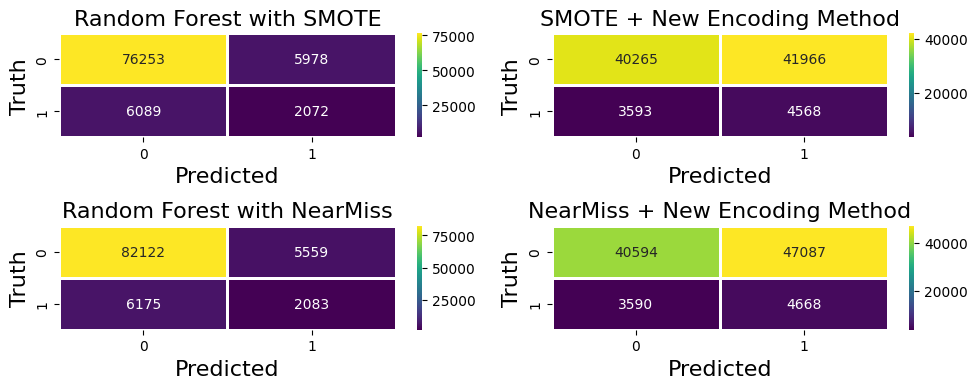

In [110]:
%matplotlib inline
cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
cm_rf_nearmiss = confusion_matrix(y_test, y_pred_rf_nearmiss)
cm_rf_smote_new = confusion_matrix(y_test_new, y_pred_rf_smote_new)
cm_rf_nearmiss_new = confusion_matrix(y_test_new, y_pred_rf_nearmiss_new)

fig, axs = plt.subplots(2,2, figsize=(10,4))

plot_confusion_matrix(axs[0,0], cm_rf_smote, title='Random Forest with SMOTE')
plot_confusion_matrix(axs[0,1], cm_rf_nearmiss, title='SMOTE + New Encoding Method')
plot_confusion_matrix(axs[1,0], cm_rf_smote_new, title='Random Forest with NearMiss')
plot_confusion_matrix(axs[1,1], cm_rf_nearmiss_new, title='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()

In [113]:
from sklearn.metrics import accuracy_score

# Tính độ chính xác trên tập huấn luyện và tập thử nghiệm cho phương pháp SMOTE
accuracy_train_smote = accuracy_score(y_train_smote, model_rf_cv_smote.predict(X_train_smote))
accuracy_test_smote = accuracy_score(y_test, y_pred_rf_smote)

# Tính độ chính xác trên tập huấn luyện và tập thử nghiệm cho phương pháp SMOTE và mã hóa mới
accuracy_train_smote_new = accuracy_score(y_train_smote_new, model_rf_cv_smote_new.predict(X_train_smote_new))
accuracy_test_smote_new = accuracy_score(y_test_new, y_pred_rf_smote_new)

# Tính độ chính xác trên tập huấn luyện và tập thử nghiệm cho phương pháp NearMiss
accuracy_train_nearmiss = accuracy_score(y_train_nearmiss, model_rf_cv_nearmiss.predict(X_train_nearmiss))
accuracy_test_nearmiss = accuracy_score(y_test, y_pred_rf_nearmiss)

# Tính độ chính xác trên tập huấn luyện và tập thử nghiệm cho phương pháp NearMiss và mã hóa mới
accuracy_train_nearmiss_new = accuracy_score(y_train_nearmiss_new, model_rf_cv_nearmiss_new.predict(X_train_nearmiss_new))
accuracy_test_nearmiss_new = accuracy_score(y_test_new, y_pred_rf_nearmiss_new)

# In ra độ chính xác trên tập huấn luyện và tập thử nghiệm cho từng trường hợp
print("Accuracy on Train set (SMOTE):", accuracy_train_smote)
print("Accuracy on Test set (SMOTE):", accuracy_test_smote)

print("Accuracy on Train set (SMOTE + New Encoding):", accuracy_train_smote_new)
print("Accuracy on Test set (SMOTE + New Encoding):", accuracy_test_smote_new)

print("Accuracy on Train set (NearMiss):", accuracy_train_nearmiss)
print("Accuracy on Test set (NearMiss):", accuracy_test_nearmiss)

print("Accuracy on Train set (NearMiss + New Encoding):", accuracy_train_nearmiss_new)
print("Accuracy on Test set (NearMiss + New Encoding):", accuracy_test_nearmiss_new)


Accuracy on Train set (SMOTE): 0.9984855277974726
Accuracy on Test set (SMOTE): 0.8665036728914063
Accuracy on Train set (SMOTE + New Encoding): 0.9984004180891957
Accuracy on Test set (SMOTE + New Encoding): 0.877693117501746
Accuracy on Train set (NearMiss): 0.9997643485546711
Accuracy on Test set (NearMiss): 0.49598415789007877
Accuracy on Train set (NearMiss + New Encoding): 0.9999215275961287
Accuracy on Test set (NearMiss + New Encoding): 0.4717789428699486


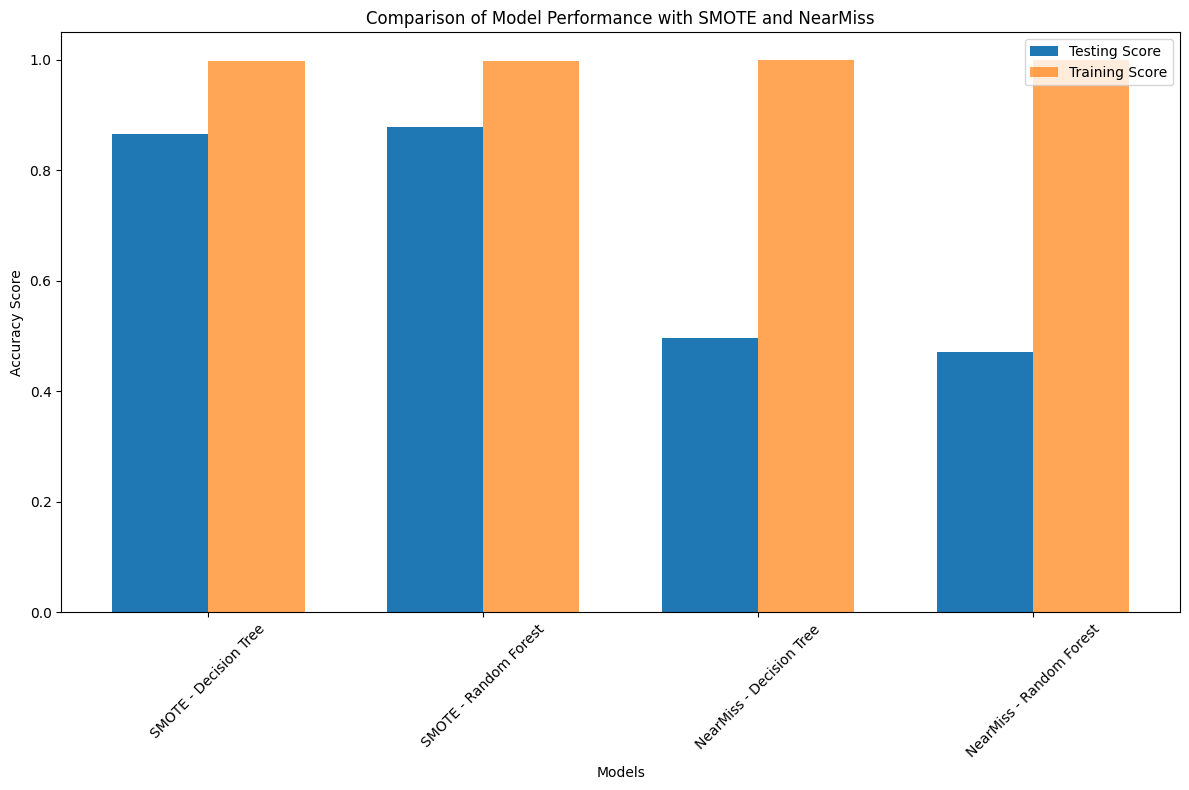

In [114]:
import matplotlib.pyplot as plt

models = ['SMOTE - Decision Tree', 'SMOTE - Random Forest', 'NearMiss - Decision Tree', 'NearMiss - Random Forest']
testing_scores = [accuracy_test_smote, accuracy_test_smote_new, accuracy_test_nearmiss, accuracy_test_nearmiss_new]
training_scores = [accuracy_train_smote, accuracy_train_smote_new, accuracy_train_nearmiss, accuracy_train_nearmiss_new]

bar_width = 0.35  # Độ rộng của mỗi cột
index = range(len(models))  # Số chỉ mục cho mỗi thuật toán

plt.figure(figsize=(12, 8))
plt.bar(index, testing_scores, bar_width, label='Testing Score')
plt.bar([i + bar_width for i in index], training_scores, bar_width, label='Training Score', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Performance with SMOTE and NearMiss')
plt.xticks([i + bar_width/2 for i in index], models, rotation=45)  # Đặt nhãn cho các chỉ mục và xoay chúng
plt.legend()
plt.tight_layout()
plt.show()
